In [1]:
!pip install numpy pandas scikit-learn seaborn matplotlib

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

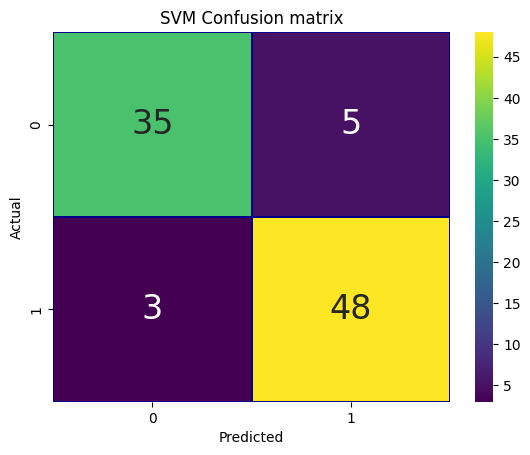

SVM:
Confusion Matrix:
[[35  5]
 [ 3 48]]
Accuracy: 0.9120879120879121
Precision: 0.9056603773584906
Recall: 0.9411764705882353
F1 Score: 0.923076923076923
Sensitivity: 0.9210526315789473
Specificity: 0.9056603773584906


In [3]:
#svm

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Loading dataset
heartdisease = 'heart.csv'
df = pd.read_csv(heartdisease)

# Considering a target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

svmachine = SVC(C=11, kernel='linear')
model_svmachine = svmachine.fit(X_train, y_train)
pred_svmachine = model_svmachine.predict(X_test)
conmat_svmachine = confusion_matrix(y_test, pred_svmachine)

# Confusion matrix representation
sns.heatmap(conmat_svmachine, annot=True, cmap='viridis', linewidths=0.2, linecolor='darkblue', annot_kws={"size": 24})
plt.title('SVM Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Finding required parameters
TruePositive_svm = conmat_svmachine[0][0]
TrueNegative_svm = conmat_svmachine[1][1]
FalseNegative_svm = conmat_svmachine[1][0]
FalsePositive_svm = conmat_svmachine[0][1]
sensitivity_svm = TruePositive_svm / (TruePositive_svm + FalseNegative_svm)
specificity_svm = TrueNegative_svm / (TrueNegative_svm + FalsePositive_svm)

# Results
print("SVM:")
print("Confusion Matrix:")
print(conmat_svmachine)
print("Accuracy:", accuracy_score(y_test, pred_svmachine))
print("Precision:", precision_score(y_test, pred_svmachine))
print("Recall:", recall_score(y_test, pred_svmachine))
print("F1 Score:", f1_score(y_test, pred_svmachine))
print("Sensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)


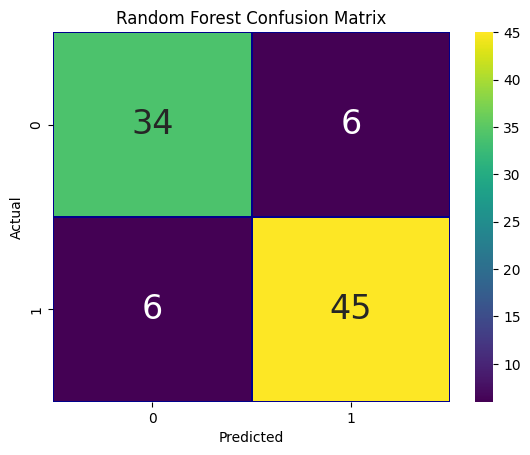

Random Forest:
Confusion Matrix:
[[34  6]
 [ 6 45]]
Accuracy: 0.8681318681318682
Precision: 0.8823529411764706
Recall: 0.8823529411764706
F1 Score: 0.8823529411764706
Sensitivity: 0.85
Specificity: 0.8823529411764706


In [4]:

from sklearn.ensemble import RandomForestClassifier

# Loading data
heartdisease = 'heart.csv'
df = pd.read_csv(heartdisease)

# Considering a target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Random Forest Classifier
rand_for = RandomForestClassifier(n_estimators=100, random_state=40)
rand_for_model = rand_for.fit(X_train, y_train)
rand_for_pred = rand_for_model.predict(X_test)
rand_for_conmat = confusion_matrix(y_test, rand_for_pred)

#Confusion matrix
sns.heatmap(rand_for_conmat, annot=True, cmap='viridis', linewidths=0.2, linecolor='darkblue', annot_kws={"size": 24})
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TruePositive_rf = rand_for_conmat[0][0]
TrueNegative_rf = rand_for_conmat[1][1]
FalseNegative_rf = rand_for_conmat[1][0]
FalsePositive_rf = rand_for_conmat[0][1]
sensitivity_rf = TruePositive_rf / (TruePositive_rf + FalseNegative_rf)
specificity_rf = TrueNegative_rf / (TrueNegative_rf + FalsePositive_rf)

#Results
print("Random Forest:")
print("Confusion Matrix:")
print(rand_for_conmat)
print("Accuracy:", accuracy_score(y_test, rand_for_pred))
print("Precision:", precision_score(y_test, rand_for_pred))
print("Recall:", recall_score(y_test, rand_for_pred))
print("F1 Score:", f1_score(y_test, rand_for_pred))
print("Sensitivity:", sensitivity_rf)
print("Specificity:", specificity_rf)


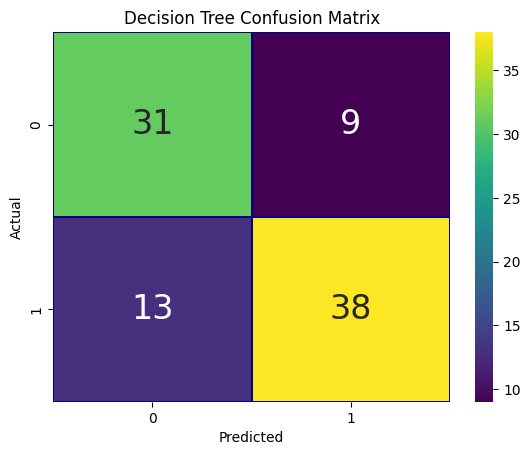

Decision Tree:
Confusion Matrix:
[[31  9]
 [13 38]]
Accuracy: 0.7582417582417582
Precision: 0.8085106382978723
Recall: 0.7450980392156863
F1 Score: 0.7755102040816325
Sensitivity: 0.7045454545454546
Specificity: 0.8085106382978723


In [5]:

from sklearn.tree import DecisionTreeClassifier

# Loading data
heartdisease = 'heart.csv'
df = pd.read_csv(heartdisease)

# Considering a target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree_model = dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree_model.predict(X_test)
dec_tree_conmat= confusion_matrix(y_test, dec_tree_pred)

# confusion matrix
sns.heatmap(dec_tree_conmat, annot=True, cmap='viridis', linewidths=0.2, linecolor='darkblue', annot_kws={"size": 24})
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TruePositive_dt = dec_tree_conmat[0][0]
TrueNegative_dt = dec_tree_conmat[1][1]
FalseNegative_dt = dec_tree_conmat[1][0]
FalsePositive_dt = dec_tree_conmat[0][1]
sensitivity_dt = TruePositive_dt / (TruePositive_dt + FalseNegative_dt)
specificity_dt = TrueNegative_dt / (TrueNegative_dt + FalsePositive_dt)

# results
print("Decision Tree:")
print("Confusion Matrix:")
print(dec_tree_conmat)
print("Accuracy:", accuracy_score(y_test, dec_tree_pred))
print("Precision:", precision_score(y_test, dec_tree_pred))
print("Recall:", recall_score(y_test, dec_tree_pred))
print("F1 Score:", f1_score(y_test, dec_tree_pred))
print("Sensitivity:", sensitivity_dt)
print("Specificity:", specificity_dt)


Construction of heart disease prediction system

In [23]:
inp_data = (57,0,0,120,354,0,1,163,1,0.6,2,0,2)

# converting inp data as numpy array
inp_data_numpy_array= np.asarray(inp_data)

# reshaping numpy array
inp_data_reshaping = inp_data_numpy_array.reshape(1,-1)

#making prediction
pred = model_svmachine.predict(inp_data_reshaping)
print(pred)

if (pred[0]== 0):
  print('The Person is not suffering with any Heart Disease')
else:
  print('The Person is having a Heart Disease')

[1]
The Person is having a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
inp_data = (58,1,0,125,300,0,0,171,0,0,2,2,3)

# converting inp data as numpy array
inp_data_numpy_array= np.asarray(inp_data)

# reshaping numpy array
inp_data_reshaping = inp_data_numpy_array.reshape(1,-1)

#making prediction
pred = model_svmachine.predict(inp_data_reshaping)
print(pred)

if (pred[0]== 0):
  print('The Person is not suffering with any Heart Disease')
else:
  print('The Person is having a Heart Disease')

[0]
The Person is not suffering with any Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
